## **Desafio2 Sebastián Acevedo Espinoza**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

# _Pregunta 1_

In [39]:
#cargamos y leemos el archivo de excel
df=pd.read_excel("Retail_Invoices.xlsx")
df

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
0,536365,2010-12-01,17850,40,139.12,7
1,536366,2010-12-01,17850,12,22.20,2
2,536367,2010-12-01,13047,83,278.73,12
3,536368,2010-12-01,13047,15,70.05,4
4,536369,2010-12-01,13047,3,17.85,1
...,...,...,...,...,...,...
22185,C581484,2011-12-09,16446,-80995,-168469.60,1
22186,C581490,2011-12-09,14397,-23,-32.53,2
22187,C581499,2011-12-09,15498,-1,-224.69,1
22188,C581568,2011-12-09,15311,-5,-54.75,1


In [40]:
# Información general del DataFrame
df_info = df.info()

# Estadísticas descriptivas
df_describe = df.describe()

# Valores nulos por columna
missing_values = df.isnull().sum()

# Valores únicos por columna
unique_values = df.nunique()

df_info, df_describe, missing_values, unique_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22190 entries, 0 to 22189
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    22190 non-null  object        
 1   InvoiceDate  22190 non-null  datetime64[ns]
 2   CustomerID   22190 non-null  int64         
 3   Quantity     22190 non-null  int64         
 4   price_total  22190 non-null  float64       
 5   StockCode    22190 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.0+ MB


(None,
                          InvoiceDate    CustomerID      Quantity  \
 count                          22190  22190.000000  22190.000000   
 mean   2011-06-29 05:59:15.223073536  15238.498738    221.130599   
 min              2010-12-01 00:00:00  12346.000000 -80995.000000   
 25%              2011-03-29 00:00:00  13755.000000     30.000000   
 50%              2011-07-08 00:00:00  15136.000000    120.000000   
 75%              2011-10-10 00:00:00  16746.000000    254.000000   
 max              2011-12-09 00:00:00  18287.000000  80995.000000   
 std                              NaN   1733.149624   1170.215301   
 
          price_total     StockCode  
 count   22190.000000  22190.000000  
 mean      374.045327     18.333889  
 min   -168469.600000      1.000000  
 25%        87.962500      3.000000  
 50%       241.505000     12.000000  
 75%       418.022500     24.000000  
 max    168469.600000    542.000000  
 std      2018.482869     23.892111  ,
 InvoiceNo      0
 InvoiceD

# _Pregunta 2_

In [41]:
# Asegurémonos de trabajar solo con ventas positivas (excluyendo devoluciones)
df_clean = df[(df['Quantity'] > 0) & (df['price_total'] > 0)].copy()

# Fecha de referencia para calcular la recencia
reference_date = df_clean['InvoiceDate'].max()

# Cálculamos las variables RFM
rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recencia
    'InvoiceNo': 'nunique',                                    # Frecuencia
    'price_total': 'sum'                                       # Monto
}).reset_index()

# Renombramos las columnas
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# imprimimos el resultado
rfm


,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,77183.60
1,12347,2,7,4310.00
2,12348,75,4,1797.24
3,12349,18,1,1757.55
4,12350,310,1,334.40
...,...,...,...,...
4333,18280,277,1,180.60
4334,18281,180,1,80.82
4335,18282,7,2,178.05
4336,18283,3,16,2094.88


# _Pregunta 3_

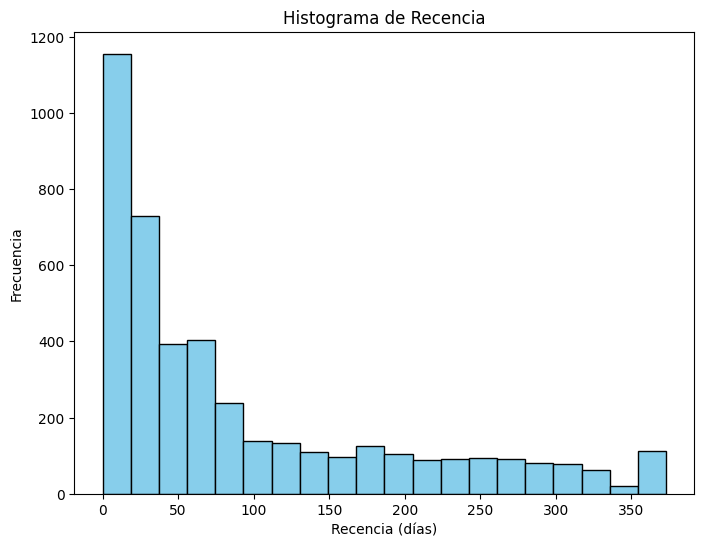

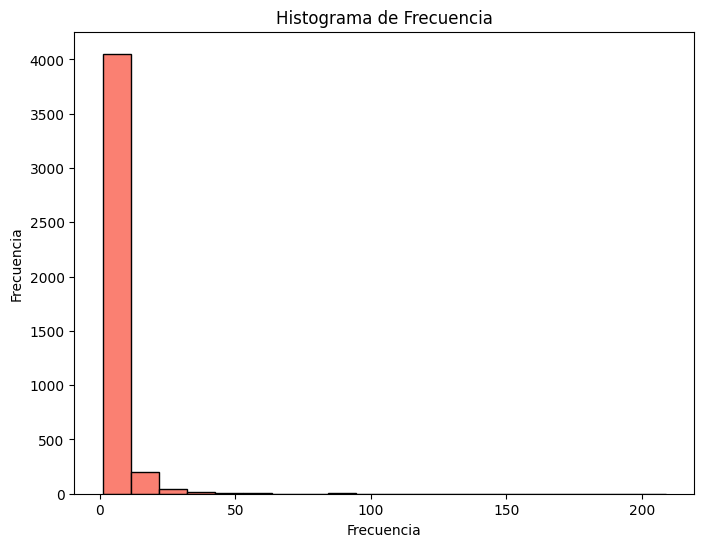

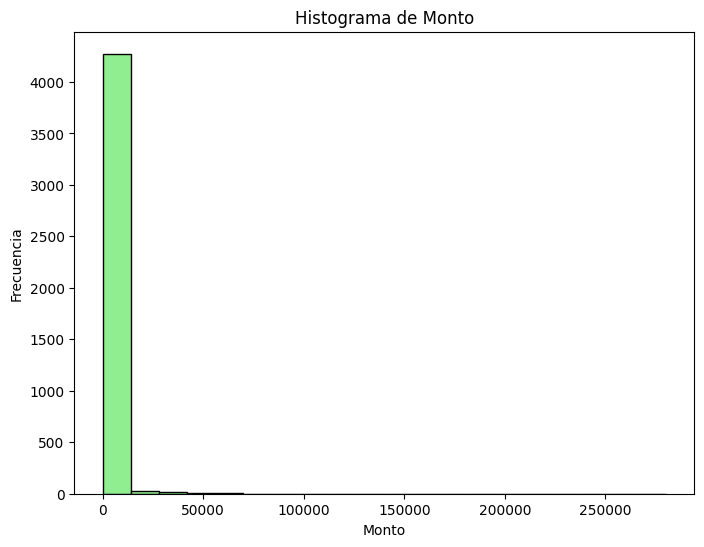

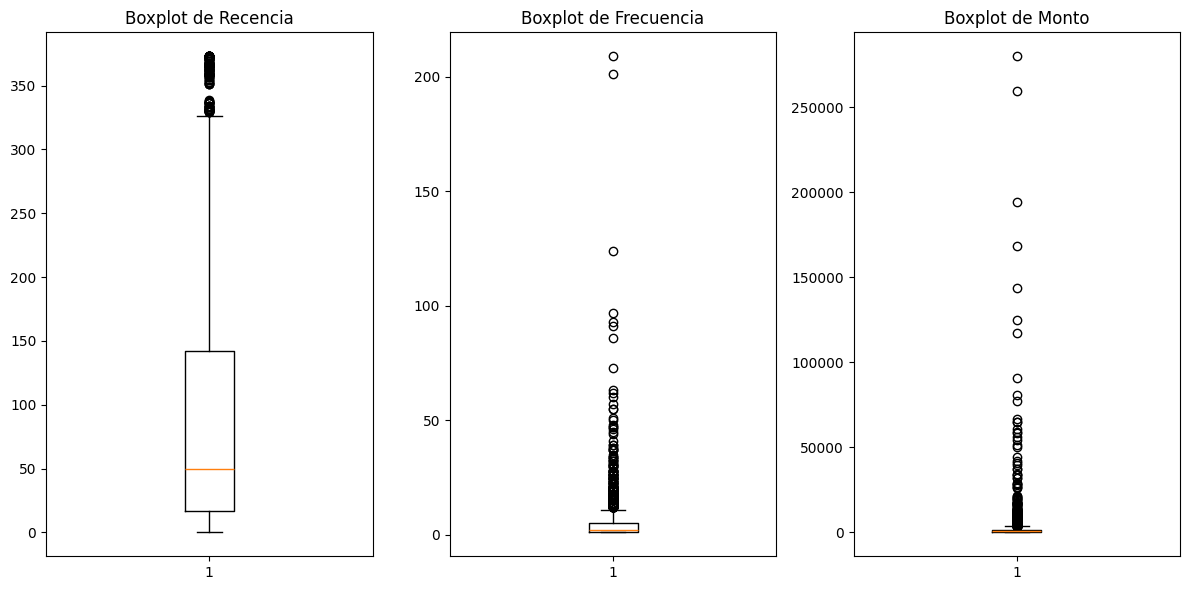

      Recency  Recency_log  Frequency  Frequency_boxcox  Monetary  \
0         325     5.786897          1          0.538124  77183.60   
1           2     1.098612          7          1.041558   4310.00   
2          75     4.330733          4          0.926114   1797.24   
3          18     2.944439          1          0.538124   1757.55   
4         310     5.739793          1          0.538124    334.40   
...       ...          ...        ...               ...       ...   
4333      277     5.627621          1          0.538124    180.60   
4334      180     5.198497          1          0.538124     80.82   
4335        7     2.079442          2          0.743428    178.05   
4336        3     1.386294         16          1.158539   2094.88   
4337       42     3.761200          3          0.854984   1837.28   

      Monetary_boxcox  
0            7.138166  
1            5.919794  
2            5.485079  
3            5.473538  
4            4.550133  
...               ...  
433

In [42]:
# Análisis exploratorio de las variables RFM

# Resumen estadístico
rfm_describe = rfm.describe()

# Histograma de Recencia

plt.figure(figsize=(8, 6))
plt.hist(rfm['Recency'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Recencia')
plt.xlabel('Recencia (días)')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de Frecuencia
plt.figure(figsize=(8, 6))
plt.hist(rfm['Frequency'], bins=20, color='salmon', edgecolor='black')
plt.title('Histograma de Frecuencia')
plt.xlabel('Frecuencia')
plt.ylabel('Frecuencia')
plt.show()


# Histograma de Monto
plt.figure(figsize=(8, 6))
plt.hist(rfm['Monetary'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histograma de Monto')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.show()

# Boxplots para identificar outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.boxplot(rfm['Recency'])
plt.title('Boxplot de Recencia')

plt.subplot(1, 3, 2)
plt.boxplot(rfm['Frequency'])
plt.title('Boxplot de Frecuencia')

plt.subplot(1, 3, 3)
plt.boxplot(rfm['Monetary'])
plt.title('Boxplot de Monto')

plt.tight_layout()
plt.show()

# Transformación de variables (ejemplos)

# Recencia:  Logaritmo para reducir el sesgo
rfm['Recency_log'] = np.log1p(rfm['Recency'])


# Frecuencia y Monetary:  Transformación de Box-Cox (requiere valores positivos)
from scipy import stats
rfm['Frequency_boxcox'], _ = stats.boxcox(rfm['Frequency'] + 1) # Se suma 1 para evitar 0s
rfm['Monetary_boxcox'], _ = stats.boxcox(rfm['Monetary'] + 1)


# Mostramos el DataFrame transformado
print(rfm[['Recency', 'Recency_log', 'Frequency', 'Frequency_boxcox', 'Monetary', 'Monetary_boxcox']])


#  Gráficos de las variables transformadas para comparar
# (similar a los histogramas y boxplots de antes, pero con las nuevas variables)
# ... (Agregar aquí los nuevos gráficos para Recency_log, Frequency_boxcox, Monetary_boxcox)


# _Pregunta 4_

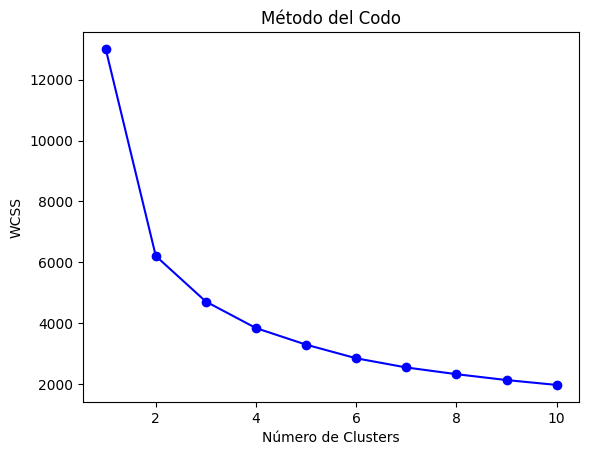

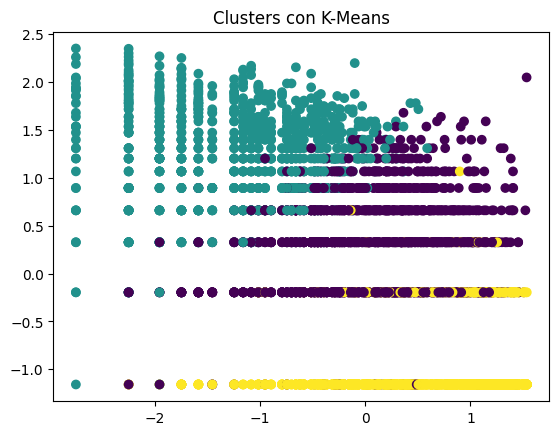

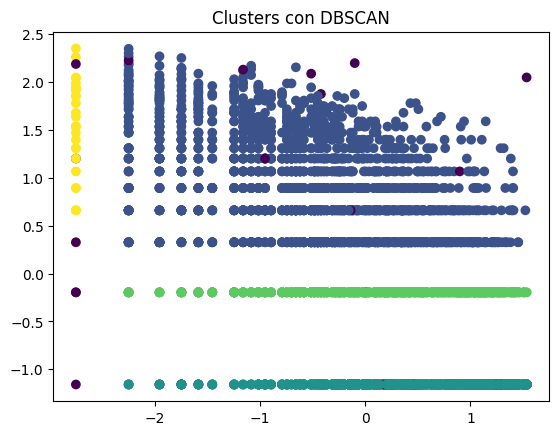

Silhouette Score K-Means: 0.33945502266204836
Silhouette Score DBSCAN: 0.18368778421117066


In [43]:
# Preparación de los datos para clustering
# Seleccionamos las columnas transformadas para el clustering
rfm_scaled = rfm[['Recency_log', 'Frequency_boxcox', 'Monetary_boxcox']]

# Escalamos los datos
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_scaled)

# K-Means
# Encontrar el mejor número de clusters usando el método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, 'bo-')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

# Aplicamos K-Means con el número óptimo de clusters (según el método del codo)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0) # Ejemplo con 3 clusters
kmeans.fit(rfm_scaled)
rfm['Cluster_KMeans'] = kmeans.labels_

# Visualizamos los clusters de K-Means (ejemplo con las primeras dos variables)
plt.scatter(rfm_scaled[:,0], rfm_scaled[:,1], c=rfm['Cluster_KMeans'])
plt.title('Clusters con K-Means')
plt.show()


# DBSCAN
# Aplicamos DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5) # Ajustar eps y min_samples según sea necesario
dbscan.fit(rfm_scaled)
rfm['Cluster_DBSCAN'] = dbscan.labels_

# Visualizamos los clusters de DBSCAN
plt.scatter(rfm_scaled[:, 0], rfm_scaled[:, 1], c=rfm['Cluster_DBSCAN'])
plt.title('Clusters con DBSCAN')
plt.show()

#Evaluación con Silhouette Score
print("Silhouette Score K-Means:", silhouette_score(rfm_scaled, rfm['Cluster_KMeans']))
print("Silhouette Score DBSCAN:", silhouette_score(rfm_scaled, rfm['Cluster_DBSCAN']))


# _Pregunta 5_

In [44]:
# Análisis de la calidad de los clusters y asignación de nombres descriptivos

# Silhouette Score
print("Silhouette Score K-Means:", silhouette_score(rfm_scaled, rfm['Cluster_KMeans']))
print("Silhouette Score DBSCAN:", silhouette_score(rfm_scaled, rfm['Cluster_DBSCAN']))

# Análisis de los centroides para K-Means (si el número de clusters es razonable)
kmeans_centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=['Recency_log', 'Frequency_boxcox', 'Monetary_boxcox'])
print("\nCentroides de K-Means:\n", kmeans_centroids)

# Descripción de los segmentos (ejemplo para K-Means, adaptar a DBSCAN y otros)
# Se asume un K-Means con 3 clusters como ejemplo.
cluster_analysis = rfm.groupby('Cluster_KMeans').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})
print("\nAnálisis de los clusters:\n", cluster_analysis)


# Asignación de nombres descriptivos a los segmentos (adaptar según tus datos)
# Basado en la tabla cluster_analysis
segment_names = {
    0: "Clientes Leales de Alto Gasto", # Ejemplo: Recencia baja, frecuencia alta, monto alto
    1: "Clientes Recientes con Gasto Moderado", # Ejemplo: Recencia baja, frecuencia media, monto medio
    2: "Clientes Inactivos de Bajo Gasto" # Ejemplo: Recencia alta, frecuencia baja, monto bajo
}

rfm['Segment'] = rfm['Cluster_KMeans'].map(segment_names)
print("\nDataFrame con segmentos:\n",rfm[['CustomerID', 'Cluster_KMeans', 'Segment']])

#Para DBSCAN, la interpretación es diferente ya que no hay centroides.

Silhouette Score K-Means: 0.33945502266204836
Silhouette Score DBSCAN: 0.18368778421117066

Centroides de K-Means:
    Recency_log  Frequency_boxcox  Monetary_boxcox
0     3.873518          0.844967         5.106266
1     2.175202          1.050928         5.757484
2     4.706524          0.568127         4.346118

Análisis de los clusters:
                    Recency  Frequency     Monetary
Cluster_KMeans                                    
0                70.916054   3.294118  1230.855400
1                12.697239  11.052268  6279.926538
2               160.014184   1.151891   316.079421

DataFrame con segmentos:
       CustomerID  Cluster_KMeans                                Segment
0          12346               0          Clientes Leales de Alto Gasto
1          12347               1  Clientes Recientes con Gasto Moderado
2          12348               0          Clientes Leales de Alto Gasto
3          12349               0          Clientes Leales de Alto Gasto
4          123